In [1]:
print("Lord Balaji")

Lord Balaji


# Linear Regration Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
lcd = pd.read_csv('E:\Python_Vedeo\DataSets\Lung Cap\LungCapData.csv')
lcd.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [6]:
lcd.shape

(725, 6)

In [9]:
lcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [10]:
lcd.keys()

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [11]:
lcd['Smoke'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
lcd['Gender'].unique()

array(['male', 'female'], dtype=object)

In [13]:
lcd['Caesarean'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
lcd.Smoke.replace({'no':0,'yes':1}, inplace = True)

In [19]:
lcd['Gender'].replace({'male':0, 'female':1}, inplace=True)

In [20]:
lcd.Caesarean.replace({'no':0,'yes':1}, inplace=True)

In [21]:
lcd.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


# Train and Test Data

In [27]:
lcd_x = lcd.iloc[:,1:6]
lcd_x.head()

,Age,Height,Smoke,Gender,Caesarean
0,6,62.1,0,0,0
1,18,74.7,1,1,0
2,16,69.7,0,1,1
3,14,71.0,0,0,0
4,5,56.9,0,0,0


In [42]:
lcd_y = lcd.iloc[:,0]
lcd_y.shape

(725,)

In [37]:
X_train, X_test, y_train, y_test =train_test_split(lcd_x, lcd_y, test_size = 0.2, random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(580, 5)
(145, 5)
(580,)
(145,)


# BUILD LINEAR REGRESSION MODEL

In [31]:
from sklearn.linear_model import LinearRegression

In [36]:
lm =LinearRegression()

# Fit the Model

In [43]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predict the data on test dataset

In [46]:
lm_pred = lm.predict(X_test).round(2)
lm_pred

array([ 9.68,  8.41,  8.3 ,  8.21,  6.72,  8.16,  8.  ,  3.9 ,  5.05,
        9.78, 10.  ,  3.71,  6.49,  6.19,  2.55,  4.12,  5.65,  7.2 ,
        6.47,  3.87,  8.96, 12.32,  6.91,  9.91,  5.65,  7.34,  6.99,
        3.33,  8.94, 12.04, 12.98,  9.95,  8.86,  9.48, 10.15,  6.11,
        7.48,  3.05,  8.24,  8.29, 11.2 ,  3.3 ,  5.26,  8.78,  6.94,
        3.25,  7.04,  8.61,  5.71,  6.25,  4.39, 11.14,  8.59,  7.81,
        4.23, 10.25, 10.3 ,  9.54,  9.7 ,  7.83,  6.58, 10.42,  6.44,
        5.91,  7.27,  7.24, 12.57,  1.91, 10.51,  8.54,  4.49, 12.04,
       10.9 ,  8.06,  7.2 ,  5.17,  6.12,  3.45,  7.86,  5.64,  8.81,
       12.35,  5.48, 10.43, 11.71,  7.6 ,  9.15,  3.21,  6.99,  9.27,
       11.34, 10.11,  9.99,  7.75,  8.21,  8.57,  6.01,  9.12,  4.82,
        2.85,  7.4 ,  3.96,  5.17,  5.77,  4.03,  6.73,  8.88,  9.36,
        7.55, 10.74, 11.05,  5.82,  4.84,  6.55,  4.9 , 10.39,  5.98,
       11.72,  6.54,  6.41,  7.55, 10.88, 10.46,  6.92,  7.77,  7.13,
       10.79,  4.88,

In [49]:
X_test

,Age,Height,Smoke,Gender,Caesarean
326,15,69.0,0,0,0
518,15,65.8,0,1,0
554,15,65.4,0,1,0
33,13,65.6,0,0,1
375,9,63.9,0,1,1
...,...,...,...,...,...
449,13,63.1,0,1,1
329,8,60.0,0,1,0
377,11,70.2,0,0,1
430,6,62.9,0,1,0


# compaire predicted and actual values

In [51]:
tab_lm = pd.DataFrame({'Predicted':lm_pred, 'Actual':y_test})
tab_lm

,Predicted,Actual
326,9.68,8.325
518,8.41,9.900
554,8.30,8.575
33,8.21,11.025
375,6.72,6.175
...,...,...
449,7.13,7.925
329,5.76,4.500
377,9.13,8.625
430,6.22,7.025


In [57]:
Acc = tab_lm.Predicted/tab_lm.Actual*100
Acc

326    116.276276
518     84.949495
554     96.793003
33      74.467120
375    108.825911
          ...    
449     89.968454
329    128.000000
377    105.855072
430     88.540925
136    123.708609
Length: 145, dtype: float64

In [58]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_squared_error(lm_pred, y_test)

1.134666896551724

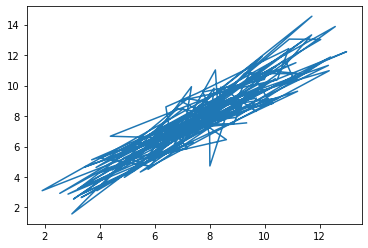

In [64]:
plt.plot(lm_pred, y_test)
plt.show()

In [66]:
lm.score(X_test, y_test)

0.8381802829214936